In [65]:
import pandas as pd
df=pd.read_csv('50_Startups.csv')
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [66]:
df.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

<AxesSubplot:>

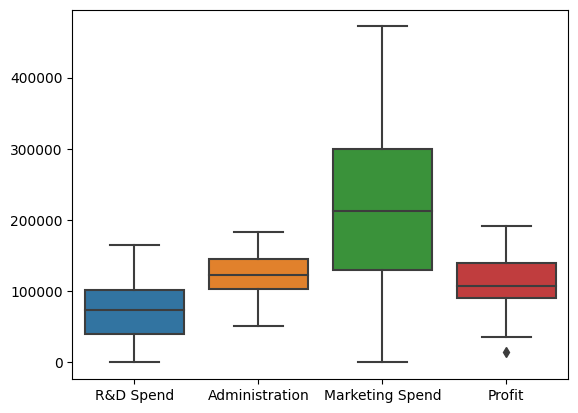

In [67]:
import seaborn as sns
sns.boxplot(data=df)

In [68]:
import numpy as np
IDR=df['Profit'].quantile(0.75)-df['Profit'].quantile(0.25)
min_profit=df['Profit'].quantile(0.25)-1.5*IDR
max_profit=df['Profit'].quantile(0.75)+1.5*IDR
df['Profit'] = np.where(
    df['Profit']>max_profit,
    max_profit,
    np.where(
        df['Profit']<min_profit,
        min_profit,
        df['Profit']
    )
)

<AxesSubplot:xlabel='State'>

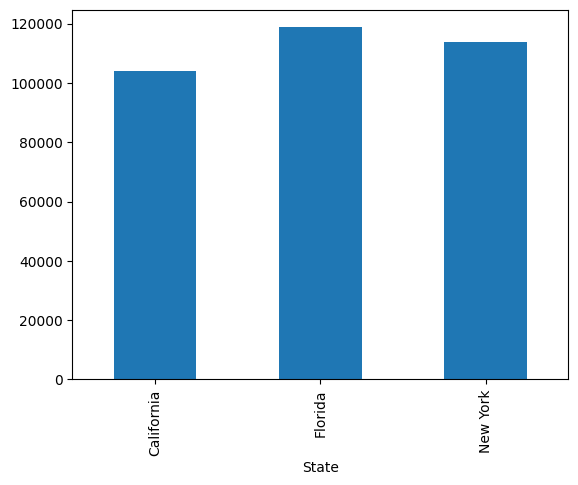

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
df1=df.groupby('State')['Profit'].mean().plot(kind='bar')
df1

In [70]:
df=df.drop('State',axis=1)

In [71]:
X=df.drop('Profit',axis=1)
y=df['Profit']

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=24)

In [73]:
from sklearn.preprocessing import StandardScaler
sta=StandardScaler()
sta.fit(X_train)
X_train = sta.transform(X_train)
X_test = sta.transform(X_test)

In [74]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [75]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)


0.9628624506810248

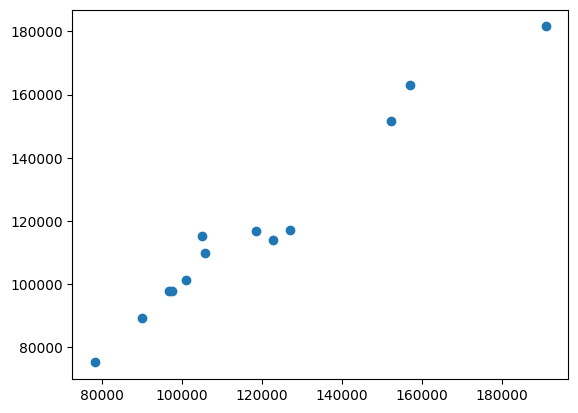

In [82]:
plt.scatter(x=y_test,y=y_pred_lo)